<a href="https://colab.research.google.com/github/Junseokee/Study-Python/blob/main/pytoch_practice_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
torch.__version__

'1.11.0+cu113'

초기화되지않은 텐서

In [3]:
x = torch.empty(4,2)
print(x)

tensor([[8.9392e-35, 0.0000e+00],
        [3.3631e-44, 0.0000e+00],
        [       nan, 0.0000e+00],
        [1.1578e+27, 1.1362e+30]])


무작위로 초기화된 텐서

In [4]:
x = torch.rand(4,2)
print(x)

tensor([[0.9222, 0.3204],
        [0.6408, 0.0746],
        [0.2967, 0.7627],
        [0.0903, 0.5367]])


데이터타입이 long이고, 0으로 채워진 텐서

In [5]:
x = torch.zeros(4,2,dtype=torch.long) #0으로 채우기
print(x)

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])


사용자가 입력한 값으로 텐서 초기화

In [6]:
x = torch.tensor([3, 2.3])
print(x) 

tensor([3.0000, 2.3000])


2 x 4 크기, double 타입, 1로 채워진 텐서

In [7]:
x = x.new_ones(4,2, dtype= torch.double)
print(x)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]], dtype=torch.float64)


x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [8]:
x = torch.randn_like(x, dtype=torch.float) #like(x)와 같은 모양의 랜덤 float으로 생성

텐서의 크기 계산

In [9]:
print(x.size())

torch.Size([4, 2])


#데이터 타입(Data Type)
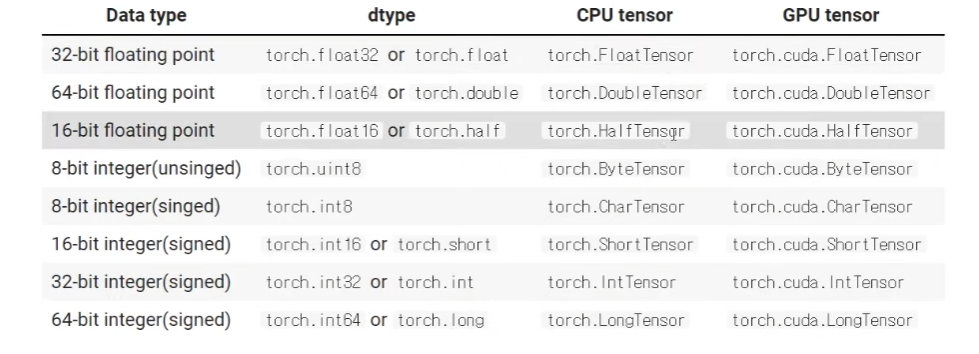![image.png](
  
)

In [10]:
ft = torch.FloatTensor([1, 2, 3])
print(ft)
print(ft.dtype)

tensor([1., 2., 3.])
torch.float32


In [13]:
x = torch.randn(1)
print(x)
print(x.item())
print(x.dtype)

tensor([0.3902])
0.3902186155319214
torch.float32


In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #쿠다가 가능하면 gpu쿠다로 실행 아니면 cpu
print(device)
y = torch.ones_like(x, device=device) #토치로 기존 x와 같은 모양의 텐서를 하나를 만들어주는데 디바이스에 넣기
print(y)
x = x.to(device) #x텐서를 Gpu로 보내기 Cuda로
print(x)
z = x+y
print(z)
print(z.to('cpu', torch.double)) #z를 double type으로 cpu로 옮기기

cuda
tensor([1.], device='cuda:0')
tensor([0.3902], device='cuda:0')
tensor([1.3902], device='cuda:0')
tensor([1.3902], dtype=torch.float64)


#다차원 텐서 표현

#0D Tensor(Scalar)
- 하나의 숫자를 담고 있는 텐서(tensor)
- 축과 형상이 없음

In [17]:
t0 = torch.tensor(0)
print(t0.ndim)
print(t0.shape)
print(t0)

0
torch.Size([])
tensor(0)


#1D Tensor(Vector)
- 값들을 저장한 리스트와 유사한 텐서
- 하나의 축이 존재

In [18]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


#2D Tensor(Matrix)
- 행렬과 같은 모양으로 두개의 축이 존재
- 일반적인 수치, 통계 데이터셋이 해당
- 주로 샘플(sample)과 특성(feature)을 가진 구조로 사용


In [20]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


#3D Tensor
- Cube와 같은 모양으로 세개의 축이 존재
- 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
- 주식가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
- 주로 Sample, timesteps, features를 가진 구조로 사용

In [21]:
t3 = torch.tensor([[[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                  [[1,2,3],
                   [4,5,6],
                   [7,8,9]],
                   [[1,2,3],
                   [4,5,6],
                   [7,8,9]]])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


#4D Tensor
- 4개의 축
- 컬러 이미지 데이터가 대표적인 사례 (흑백은 3D로 가능)
- 주로 sample, height, width, 컬러채널(channel)을 가진 구조로 사용

#5D Tensor
- 5개의 축
- 비디오 데이터가 대표적
- 4D에 프레임 추가

In [22]:
import math

a = torch.rand(1, 2) * 2 -1
print(a)
print(torch.abs(a)) #절대값
print(torch.ceil(a)) #올림
print(torch.floor(a)) #내림
print(torch.clamp(a,-0.5,0.5))  #최소값과 최대값을 지정된 범위 안으로 그이상이면 0.5 이하면 -0.5로 지정

tensor([[ 0.5894, -0.5077]])
tensor([[0.5894, 0.5077]])
tensor([[1., -0.]])
tensor([[ 0., -1.]])
tensor([[ 0.5000, -0.5000]])


In [ ]:
print(a)
print(torch.max(a))
print(torch.min(a))
print(torch.mean(a))
print(torch.std(a))


max와 min은 dim 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax : 최대값을 가진 인덱스
- argmin : 최소값을 가진 인덱스